In [2]:

#Read in packages
import uproot
import matplotlib.pyplot as plt
import numpy as np
import fastjet
import awkward as ak
import vector
vector.register_awkward()

#Read in the .root file 

file = uproot.open('SUEP-m750-generic-23.root')
#print(file['Events'].keys())

events = file['Events']
PFCands_trkEta = events['PFCands_trkEta'].array()
PFCands_trkPhi = events['PFCands_trkPhi'].array()


#Plot eta's vs phi

event_index = 5

# get data
event_eta = PFCands_trkEta[event_index]
event_phi = PFCands_trkPhi[event_index]

print(event_eta)
print(event_phi)

# plt.scatter(event_eta,event_phi,marker='o')
# plt.xlabel('Eta')
# plt.ylabel('Phi')
# plt.ylim(-4,4)
# plt.xlim(-8,8)
# plt.show()

# print(events.keys())





[1.81, -0.625, -1.78, 0.445, -0.12, -0.885, -1.18, ... -99, -99, -99, -99, -99, -99]
[2.11, -2.35, -2.57, 0.578, -0.6, 3.04, 0.775, ... -99, -99, -99, -99, -99, -99, -99]


[[False, False, False, False, False, False, ... False, False, False, False, False]]
[0.421, 0.215, 0.215, 0.203, -0.26, -0.336, ... -2.2, 1.66, -2.15, -1.69, -1.58]
[-0.56, -2.05, -1.42, 3.01, -3.14, 2.46, ... 1.87, 1.61, 2.4, 0.0743, 1.79, 3.09]


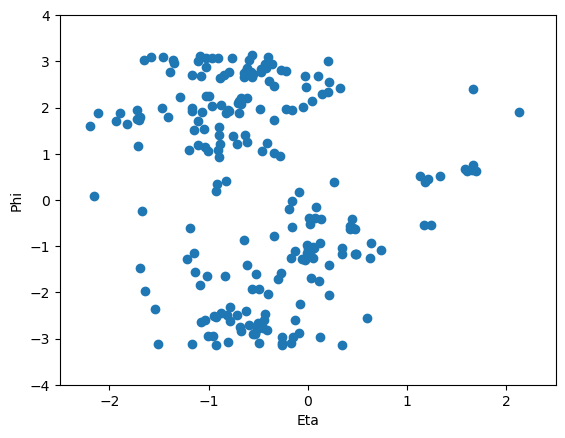

In [3]:
cut = (
    (events['PFCands_fromPV'].array() > 1)
    & (events['PFCands_trkPt'].array() >= 0.75)
    & (abs(events['PFCands_trkEta'].array()) <= 2.5)
    & (abs(events['PFCands_dz'].array()) < 10)
    & (events['PFCands_dzErr'].array() < 0.05)
)

print(cut)
PFCands_trkEta = events['PFCands_trkEta'].array()[cut] #APPLY CUTS 
PFCands_trkPhi = events['PFCands_trkPhi'].array()[cut]

#Plot eta's vs phi

# get data
event_eta = PFCands_trkEta[event_index]
event_phi = PFCands_trkPhi[event_index]

print(event_eta)
print(event_phi)

plt.scatter(event_eta,event_phi,marker='o')
plt.xlabel('Eta')
plt.ylabel('Phi')
plt.ylim(-4,4)
plt.xlim(-2.5,2.5)
plt.show()

[21, 21, 25, 25, 25, 25, 25, 25, 25, 2, ... 111, 11, -11, 11, -11, 11, -11, 11, -11]
[0.421, 0.215, 0.215, 0.203, -0.26, -0.336, ... -2.2, 1.66, -2.15, -1.69, -1.58]
[-0.56, -2.05, -1.42, 3.01, -3.14, 2.46, ... 1.87, 1.61, 2.4, 0.0743, 1.79, 3.09]


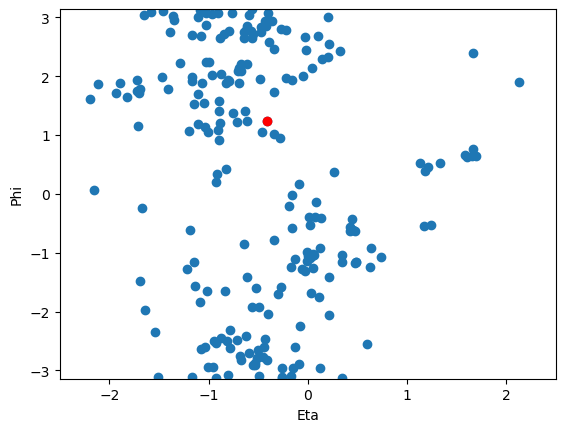

In [4]:
print(events['GenPart_pdgId'].array()[0])
GenPart_pdgId = events['GenPart_pdgId'].array()
SUEP_index = np.where(abs(GenPart_pdgId[0])==25)[0][-1]

# #Plot eta's vs phi
# event_index = 7

# get data
event_eta = PFCands_trkEta[event_index]
event_phi = PFCands_trkPhi[event_index]

print(event_eta)
print(event_phi)

plt.scatter(event_eta,event_phi,marker='o')
plt.scatter(event_eta[SUEP_index],event_phi[SUEP_index],marker='o', c ='red')

plt.xlabel('Eta')
plt.ylabel('Phi')
plt.ylim(-np.pi,np.pi)
plt.xlim(-2.5,2.5)
plt.show()


event_index 0
245
127
-2.265625 1.4140625


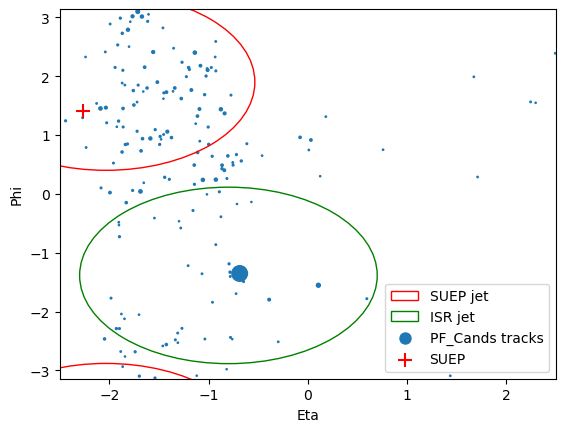

event_index 1
228
126
0.3447265625 -2.6484375


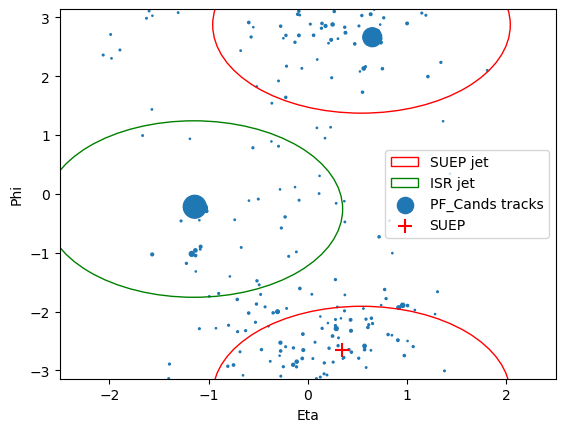

event_index 2
209
179
1.80859375 2.6328125


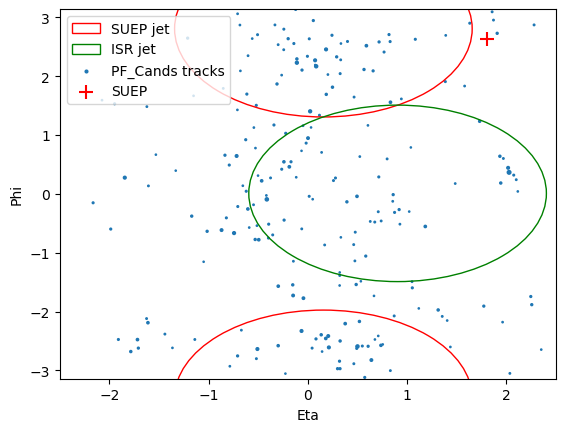

event_index 3
203
167
-1.0078125 3.0859375


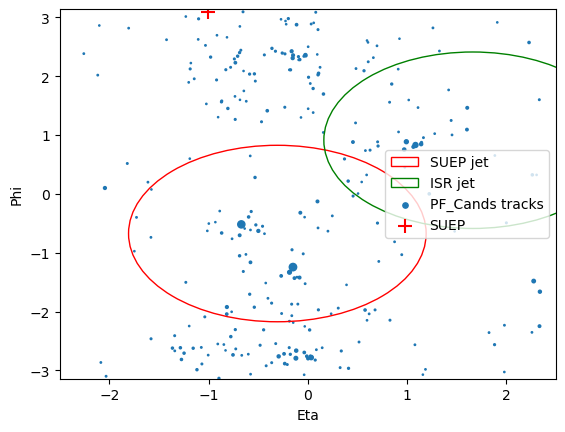

event_index 4
235
218
-3.296875 -0.4482421875


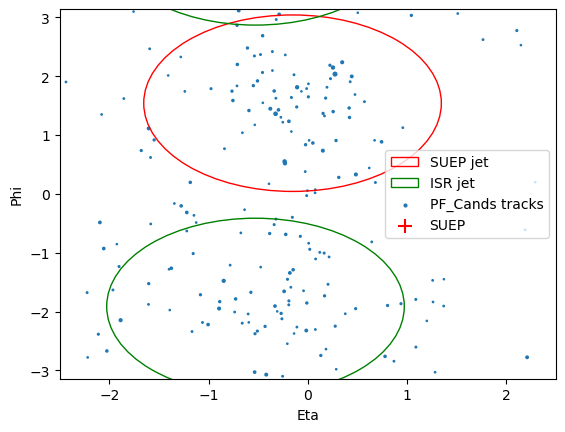

In [29]:
def FastJetReclustering(tracks, r, minPt):

    jetdef = fastjet.JetDefinition(fastjet.antikt_algorithm, r)
    cluster = fastjet.ClusterSequence(tracks, jetdef)

    # have to set min_pt = 0 and cut later to avoid some memory issues
    # FIXME: should try to understand this failure
    ak_inclusive_jets = cluster.inclusive_jets()
    ak_inclusive_cluster = cluster.constituents()

    # apply minimum pT cut
    minPtCut = ak_inclusive_jets.pt > minPt

    ak_inclusive_jets = ak_inclusive_jets[minPtCut]
    ak_inclusive_cluster = ak_inclusive_cluster[minPtCut]

    return ak_inclusive_jets, ak_inclusive_cluster

### Cut the right data for cand
cut_cand = (
(events['PFCands_fromPV'].array() > 1)
& (events['PFCands_trkPt'].array() >= 0.75)
& (abs(events['PFCands_trkEta'].array()) <= 2.5)
& (abs(events['PFCands_dz'].array()) < 10)
& (events['PFCands_dzErr'].array() < 0.05)
)

#apply cuts
#print('cut_cand', cut_cand)
PFCands_trkEta = events['PFCands_trkEta'].array()[cut_cand] 
PFCands_trkPhi = events['PFCands_trkPhi'].array()[cut_cand]
PFCands_mass = events['PFCands_mass'].array()[cut_cand]
PFCands_trkPt = events['PFCands_trkPt'].array()[cut_cand]



### Cut the right data for GenParts
cut_gen = (
(events['GenPart_pt'].array() >= 0.75)
& (abs(events['GenPart_eta'].array()) <= 2.5)
)

#apply cuts
#print('cut_gen', cut_gen)
GenPart_eta = events['GenPart_eta'].array()[cut_gen] 
GenPart_phi = events['GenPart_phi'].array()[cut_gen]
GenPart_mass = events['GenPart_mass'].array()[cut_gen]
GenPart_pt = events['GenPart_pt'].array()[cut_gen]


for event_index in range(0,5):
    print('event_index', event_index)
    
    ### Make 4 vector for clusters of events
    Cands = ak.zip(
    {
        "pt": events['PFCands_trkPt'].array()[event_index],
        "eta": events['PFCands_trkEta'].array()[event_index],
        "phi": events['PFCands_trkPhi'].array()[event_index],
        "mass": events['PFCands_mass'].array()[event_index],
    },
    with_name="Momentum4D",
    )

    result =FastJetReclustering(Cands,1.5,150)
    jets = result[0]
    tracks = result[1]
    #print(tracks)
    #print(jets)

    #Check no of clusters
    if len(jets) <2:
        continue
    #Get 2 highest pT jets
    sort_indices = np.argsort([jet.pt for jet in jets])

    #Check n.o. tracks
    if (len(tracks[sort_indices[0]]) > len(tracks[sort_indices[1]])):
            (SUEP_index,ISR_index) = (sort_indices[0],sort_indices[1])
    else:
            (SUEP_index,ISR_index) = (sort_indices[1],sort_indices[0])

    #Define SUEP_cand SUEP_cluster_tracks ISR_cand ISR_cluster_tracks


    SUEP_cand = jets[SUEP_index]
    SUEP_cluster_tracks = tracks[SUEP_index]
    ISR_cand = jets[ISR_index]
    ISR_cluster_tracks = tracks[ISR_index]

    print(len(SUEP_cluster_tracks))
    print(len(ISR_cluster_tracks))
    
    
    
    
    
    ### Plot everything 
    fig, ax = plt.subplots()
    plt.xlabel('Eta')
    plt.ylabel('Phi')
    plt.ylim(-np.pi,np.pi)
    plt.xlim(-2.5,2.5)
    
    #Plot the event tracks
    event_eta = PFCands_trkEta[event_index]
    event_phi = PFCands_trkPhi[event_index]
    plt.scatter(event_eta,event_phi,s=PFCands_trkPt[event_index],marker='o',label='PF_Cands tracks')

    #Plot SUEP circle 
    circle_SUEP_1 = plt.Circle((SUEP_cand.eta, (SUEP_cand.phi)%(2*np.pi)), 1.5, color='r',fill=False,label='SUEP jet')
    circle_SUEP_2 = plt.Circle((SUEP_cand.eta, (SUEP_cand.phi)%(2*np.pi)-(2*np.pi)), 1.5, color='r',fill=False)

    ax.add_patch(circle_SUEP_1)
    ax.add_patch(circle_SUEP_2)


    #Plot ISR circle
    circle_ISR_1 = plt.Circle((ISR_cand.eta, (ISR_cand.phi)%(2*np.pi)), 1.5, color= 'green',fill=False,label='ISR jet')
    circle_ISR_2 = plt.Circle((ISR_cand.eta, (ISR_cand.phi)%(2*np.pi)-(2*np.pi)), 1.5, color='green',fill=False)

    ax.add_patch(circle_ISR_1)
    ax.add_patch(circle_ISR_2)

    #PLOT The actual SUEP events and the actual SUEP track (red dot)  
    #plt.scatter(GenPart_eta[event_index], GenPart_phi[event_index],s=GenPart_pt[event_index], c='orange',label='GenPart tracks')

    
    GenPart_pdgId = events['GenPart_pdgId'].array() #Untrimmed
    
    SUEP_index2 = np.where(abs(GenPart_pdgId[event_index])==25)[0][-1]
    (SUEP_eta,SUEP_phi) = (events['GenPart_eta'].array()[event_index][SUEP_index2],events['GenPart_phi'].array()[event_index][SUEP_index2])
    plt.scatter( SUEP_eta,SUEP_phi,marker='+', c ='red', s = 100,label='Gen SUEP')
    #print(len(GenPart_pdgId[event_index]),len(events['GenPart_eta'].array()[event_index]),len(events['GenPart_phi'].array()[event_index]))
    print(SUEP_eta,SUEP_phi)
    plt.legend()
    plt.show()




In [6]:
#print(events.keys())
GenPart_eta = events['GenPart_eta'].array()[0]
GenPart_phi = events['GenPart_phi'].array()[0] 
print(events['GenPart_genPartIdxMother'].array()[0])
print(events['GenPart_pdgId'].array()[0])
print(events['GenPart_status'].array()[0])



[9, -1, 0, 2, 3, 4, 5, 6, 7, -1, ... 34, 43, 139, 139, 140, 140, 143, 143, 144, 144]
[21, 21, 25, 25, 25, 25, 25, 25, 25, 2, ... 111, 11, -11, 11, -11, 11, -11, 11, -11]
[21, 21, 22, 44, 44, 44, 44, 44, 44, 41, 44, 62, ... 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
for key in events.keys():
    if 'GenPart' not in key: continue
    print(key)

nGenPart
GenPart_eta
GenPart_mass
GenPart_phi
GenPart_pt
GenPart_genPartIdxMother
GenPart_pdgId
GenPart_status
GenPart_statusFlags


In [8]:
# GET TRACK EVENTS 

# GET ACTUA

In [9]:
for i, track in enumerate(events['GenPart_pdgId'].array()[10]):
    if events['GenPart_status'].array()[10][i] != 1: continue
    print(events['GenPart_pdgId'].array()[10][i],(events['GenPart_genPartIdxMother'].array()[0][i]))

13 -1
-14 130
11 132
-11 133
11 75
-11 86
11 43
-11 139
11 139
-11 140
11 143
-11 143
11 144
-11 144


In [28]:
print(events['Muon_eta'].array())

[[], [0.632, 0.25], [], [2.34], [], [], ... [], [], [], [], [-1.73, -2.22], [1.82]]


In [13]:
print(events.keys())

['run', 'luminosityBlock', 'event', 'HTXS_Higgs_pt', 'HTXS_Higgs_y', 'HTXS_stage1_1_cat_pTjet25GeV', 'HTXS_stage1_1_cat_pTjet30GeV', 'HTXS_stage1_1_fine_cat_pTjet25GeV', 'HTXS_stage1_1_fine_cat_pTjet30GeV', 'HTXS_stage1_2_cat_pTjet25GeV', 'HTXS_stage1_2_cat_pTjet30GeV', 'HTXS_stage1_2_fine_cat_pTjet25GeV', 'HTXS_stage1_2_fine_cat_pTjet30GeV', 'HTXS_stage_0', 'HTXS_stage_1_pTjet25', 'HTXS_stage_1_pTjet30', 'HTXS_njets25', 'HTXS_njets30', 'btagWeight_CSVV2', 'btagWeight_DeepCSVB', 'CaloMET_phi', 'CaloMET_pt', 'CaloMET_sumEt', 'ChsMET_phi', 'ChsMET_pt', 'ChsMET_sumEt', 'nCorrT1METJet', 'CorrT1METJet_area', 'CorrT1METJet_eta', 'CorrT1METJet_muonSubtrFactor', 'CorrT1METJet_phi', 'CorrT1METJet_rawPt', 'nPFCands', 'PFCands_d0', 'PFCands_d0Err', 'PFCands_dz', 'PFCands_dzErr', 'PFCands_eta', 'PFCands_mass', 'PFCands_phi', 'PFCands_pt', 'PFCands_puppiWeight', 'PFCands_puppiWeightNoLep', 'PFCands_trkChi2', 'PFCands_trkEta', 'PFCands_trkPhi', 'PFCands_trkPt', 'PFCands_vtxChi2', 'PFCands_charge', '